# Librerías y configuraciones


In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [127]:
pd.set_option('display.max_colwidth', 100)
warnings.filterwarnings('ignore')

---

# Carga de datos

In [128]:
df_genres = pd.read_csv('data/df_genres.csv')
df_item_genre = pd.read_csv('data/df_item_genre.csv')
df_items = pd.read_csv('data/df_items.csv')
df_reviews = pd.read_csv('data/df_reviews.csv')
df_users_items = pd.read_csv('data/df_users_items.csv')
df_users = pd.read_csv('data/df_users.csv')

----

----

# Tabla df_user_id_item_id_price

A partir de la tabla df_users_items crearemos la tabla df_user_id_item_id_price que contendra la info de los precios de cada uno de los items que consumió cada usuario.

In [129]:
df_user_id_item_id_price = df_users_items[['user_id','item_id']].merge(df_items[['item_id','price']], on = 'item_id', how='left')
df_user_id_item_id_price.head(3)

,user_id,item_id,price
0,76561197970982479,10,9.99
1,76561197970982479,30,4.99
2,76561197970982479,300,9.99


Exploraremos esta nueva tabla.

In [130]:
df_user_id_item_id_price.shape

(2796555, 3)

In [131]:
df_user_id_item_id_price.describe()

,item_id,price
count,2.796555e+06,2.796555e+06
mean,1.772729e+05,1.342945e+01
std,1.278264e+05,1.350931e+01
min,1.000000e+01,0.000000e+00
25%,3.490000e+04,4.990000e+00
50%,2.149500e+05,9.990000e+00
75%,2.655500e+05,1.999000e+01
max,5.286600e+05,7.717100e+02


In [132]:
df_user_id_item_id_price.price.max()

771.71

In [133]:
print(df_user_id_item_id_price['user_id'][df_user_id_item_id_price.price>200].count())
print(df_user_id_item_id_price['item_id'][df_user_id_item_id_price.price>200].unique())

94
[292180 401090]


In [134]:
df_user_id_item_id_price[df_user_id_item_id_price.item_id == 401090]

,user_id,item_id,price
342979,___Plasma___,401090,299.99
561782,PresidentialHomo,401090,299.99


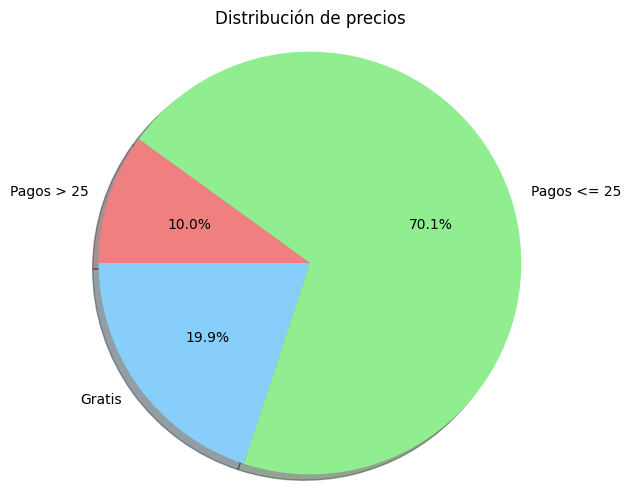

In [135]:
gratis = (df_user_id_item_id_price['price'] == 0).sum()
pagos_menores_a_20 = ((df_user_id_item_id_price['price'] > 0) & (df_user_id_item_id_price['price'] <= 25)).sum()
pagos_mayores_a_20 = len(df_user_id_item_id_price) - gratis - pagos_menores_a_20

plt.figure(figsize=(6, 6))

plt.pie([gratis, pagos_menores_a_20, pagos_mayores_a_20], 
        labels=['Gratis', 'Pagos <= 25', 'Pagos > 25'], 
        colors=['lightskyblue', 'lightgreen', 'lightcoral'], 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=180)

plt.axis('equal')  
plt.title('Distribución de precios')
plt.show()


Si bien el rango de precios va desde 0 a 771.71. Podemos notar que el 90% de los usuarios consumen items cuyo precio es menor a 25. El 20% Consume items gratuitos y solo el 10 % consume items cuyo valor supera los 25. 

También notamos que solo dos items poseen un valor mayor a 200 y fueron consumidos solo por 94 usuarios.

In [136]:
df_user_id_item_id_price.to_csv("data/df_user_id_item_id_price.csv",index=False)

----

# Tabla Developer

In [137]:
df_items.head(2)

,item_id,title,url,release_date,developer,price
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/,2018-01-04,Kotoshiro,4.99
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironbound/,2018-01-04,Secret Level SRL,0.00


In [138]:
len(df_items.developer.unique())

10632

In [139]:
df_developer = df_items[['developer','price','release_date']]
df_developer.head()

,developer,price,release_date
0,Kotoshiro,4.99,2018-01-04
1,Secret Level SRL,0.00,2018-01-04
2,Poolians.com,0.00,2017-07-24
3,彼岸领域,0.99,2017-12-07
4,NaN,2.99,NaN


In [140]:
df_developer.isna().sum()

developer       3154
price              0
release_date    1936
dtype: int64

Eliminaremos las filas con valores nulos en developer y en release_date ya que no se podrán utilizar para las consultas.

In [141]:
df_developer.dropna(subset='release_date',inplace=True)
df_developer.dropna(subset='developer',inplace=True)

In [142]:
df_developer.isna().sum()

developer       0
price           0
release_date    0
dtype: int64

Analizaremos los valores de release_date

In [143]:
lista_release = ((df_developer.release_date.unique()))

In [144]:
len(lista_release)

3252

In [145]:
sorted(lista_release,reverse=True)[0:10]

['coming soon',
 'Sep 2014',
 'Sep 2009',
 'SOON™',
 'SOON',
 'Oct 2016',
 'Oct 2010',
 'Oct 2009',
 'Nov 2016',
 'Nov 2014']

Tenemos filas que contienen strings como 'coming soon', 'SOON™','SOON', que eliminaremos, ya que indican que el item aun no se encuentra disponible.
Y fechas con formato mes, año (ej:'Oct 2016') y Año, mes, Dia (ej: '2015-03-18')
Crearemos una columna año en la cual extraeremos solo los años de estas fechas.

In [146]:
df_developer[df_developer.release_date.isin(['coming soon','SOON™','SOON'])]

,developer,price,release_date
12496,Onlyjoy`s production,0.99,SOON
30611,CI Games,19.99,coming soon
30651,David Szymanski,20.00,SOON™


In [147]:
df_developer = df_developer[~df_developer.release_date.isin(['coming soon','SOON™','SOON'])]

In [148]:
# Conviertimos la columna 'release_date' al formato de fecha
df_developer['release_date'] = pd.to_datetime(df_developer['release_date'], errors='coerce')

# Extraemos el año de la columna 'release_date'
df_developer['year'] = df_developer['release_date'].dt.year

df_developer = df_developer[['developer', 'price','year']]


In [149]:
df_developer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27593 entries, 0 to 30752
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   developer  27593 non-null  object 
 1   price      27593 non-null  float64
 2   year       27593 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 862.3+ KB


In [150]:
df_developer.developer = df_developer.developer.str.title()

In [151]:
df_developer.head(5)

,developer,price,year
0,Kotoshiro,4.99,2018
1,Secret Level Srl,0.00,2018
2,Poolians.Com,0.00,2017
3,彼岸领域,0.99,2017
5,Trickjump Games Ltd,3.99,2018


In [152]:
df_developer.to_csv('data/df_developer.csv',index= False)

-----------------------